## Stock Market Prediction And Forecasting Using Stacked LSTM

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [104]:
key = '74a6172956ee125d9bb7abd638e2f41ca1433bd3'

In [105]:
df = pd.read_csv('AAPL.csv')

In [106]:
df.head(5)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [107]:
df2 = df.reset_index()['close']

In [108]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.0500,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.1000,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.9000,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.0500,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.3200,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.960,316.500,310.3241,313.17,33843125,314.960000,316.500000,310.324100,313.170000,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.140,318.520,313.0100,315.03,25432385,313.140000,318.520000,313.010000,315.030000,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.230,319.520,316.2000,316.68,27876215,319.230000,319.520000,316.200000,316.680000,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.850,320.890,315.8700,318.66,25672211,316.850000,320.890000,315.870000,318.660000,25672211,0.0,1.0


In [109]:
df2

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [110]:
df2.shape

(1258,)

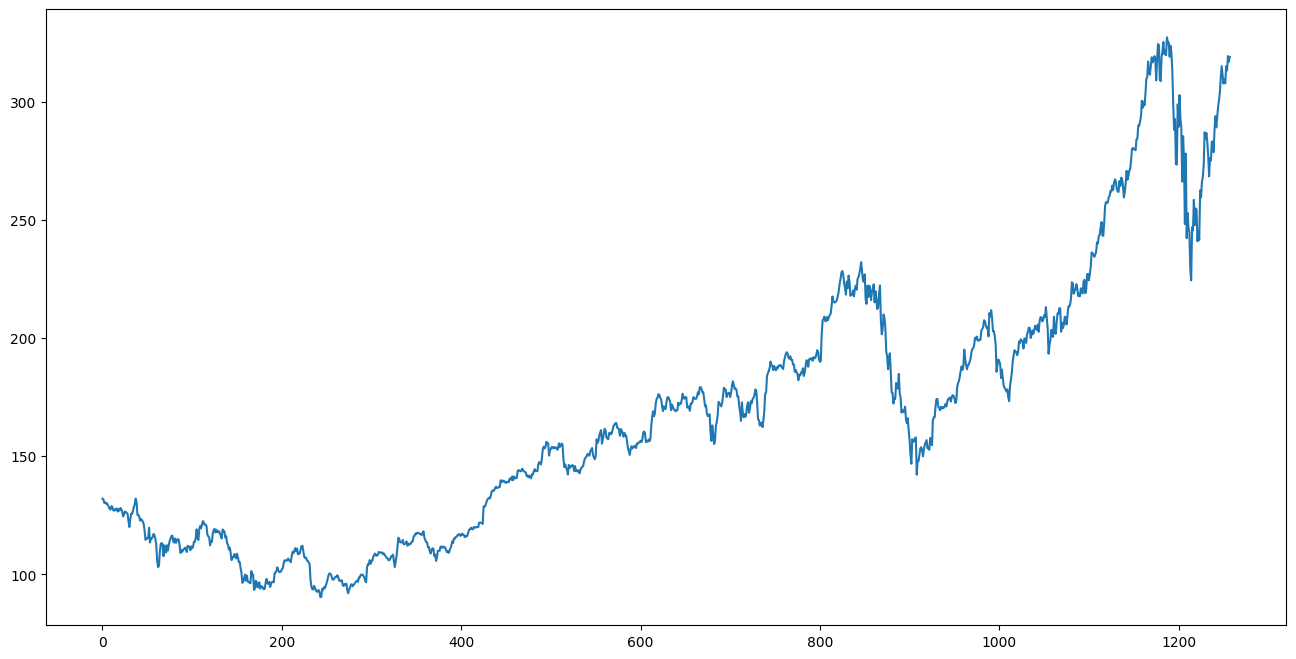

In [111]:
plt.figure(figsize=(16,8))
plt.plot(df2)
plt.show()

### LSTM are sensitive to the scale of the data. so we apply MinMax Scaler

In [112]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

### Splitting value into train and test split

In [113]:
train_size = int(len(df2)*0.65)
test_size= len(df2)- train_size

train_data, test_data = df2[0:train_size,:], df2[train_size:len(df2),:1]

In [114]:
train_data.shape, test_data.shape


((817, 1), (441, 1))

In [115]:
## covert an array of values into dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        b = dataset[i+time_step,0]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [116]:
time_step = 80
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [117]:
X_train.shape, y_train.shape

((736, 80), (736,))

In [118]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [119]:
# Create the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [120]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\keval\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [121]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [128]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80, batch_size=64, verbose=1)

Epoch 1/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.3379e-04 - val_loss: 9.8867e-04
Epoch 2/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.3379e-04 - val_loss: 9.8867e-04
Epoch 2/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.5055e-04 - val_loss: 0.0015
Epoch 3/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.5055e-04 - val_loss: 0.0015
Epoch 3/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 1.4390e-04 - val_loss: 8.4947e-04
Epoch 4/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 1.4390e-04 - val_loss: 8.4947e-04
Epoch 4/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.5598e-04 - val_loss: 9.7951e-04
Epoch 5/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 1.5598e-04 - val_loss: 9.7951e-04
Epoch 5/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 1.2495e-04 - val_loss: 0.0011
Epoch 6/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 1.2495e-04 - val_loss: 0.0011
Epoch 6/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 1.3124e-04 - val_loss: 0.0

### Prediction

In [123]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


In [124]:
# Transform Back to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [125]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict)), math.sqrt(mean_squared_error(y_test, test_predict))

(140.10510091474725, 233.77476097626652)

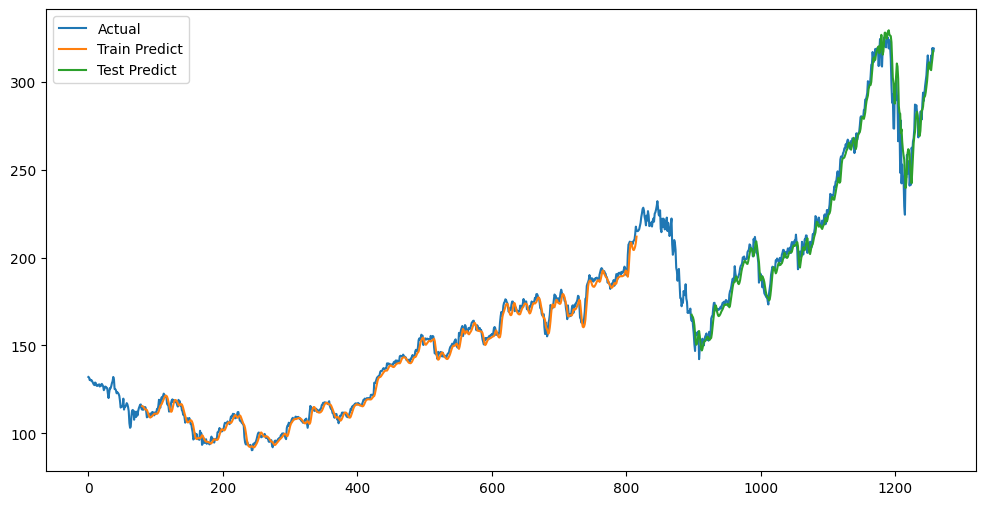

In [127]:
### Plotting
# shift train predictions for plotting
look_back = 80
train_predict_plot = np.empty_like(df2)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

# shift test predictions for plotting
test_predict_plot = np.empty_like(df2)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back*2)+1 : len(df2)-1, :] = test_predict

# plot baseline and predictions
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df2), label='Actual')
plt.plot(train_predict_plot, label='Train Predict')
plt.plot(test_predict_plot, label='Test Predict')
plt.legend()
plt.show()

In [130]:
model.save('model.keras')